# Profile PreProcessing

## 1. Gray Filter
## 2. Cropping
## 3. Binary Inversion
## 4. Integration or Individuall OCR

스크린샷 위치 : C:\Users\KH_Home\Nox_share\ImageShare\Screenshots

tesseract_path : C:\Program Files\Tesseract-OCR\tesseract.exe

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2
import pandas as pd

In [2]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [3]:
profile_path = './Screenshots/'
profile_list = glob.glob(profile_path + '*.png')
for fn in profile_list:
    print(fn)

./Screenshots\Screenshot_2020-08-23-14-29-07.png
./Screenshots\Screenshot_2020-08-23-14-29-08.png
./Screenshots\Screenshot_2020-08-23-14-29-31.png
./Screenshots\Screenshot_2020-08-23-14-29-33.png
./Screenshots\Screenshot_2020-08-23-14-29-38.png
./Screenshots\Screenshot_2020-08-23-14-29-39.png
./Screenshots\Screenshot_2020-08-23-14-29-44.png
./Screenshots\Screenshot_2020-08-23-14-29-46.png
./Screenshots\Screenshot_2020-08-23-14-29-50.png
./Screenshots\Screenshot_2020-08-23-14-29-52.png
./Screenshots\Screenshot_2020-08-23-14-29-58.png
./Screenshots\Screenshot_2020-08-23-14-30-00.png
./Screenshots\Screenshot_2020-08-23-14-30-05.png
./Screenshots\Screenshot_2020-08-23-14-30-06.png
./Screenshots\Screenshot_2020-08-23-14-30-11.png
./Screenshots\Screenshot_2020-08-23-14-30-13.png
./Screenshots\Screenshot_2020-08-23-14-30-17.png
./Screenshots\Screenshot_2020-08-23-14-30-19.png
./Screenshots\Screenshot_2020-08-23-14-30-28.png
./Screenshots\Screenshot_2020-08-23-14-30-29.png
./Screenshots\Screen

In [4]:
crop_dict = {
    'ID' : np.array([185, 216, 595, 672], dtype=int),
    'power' : np.array([290, 320, 690, 880], dtype=int),
    'kill' : np.array([290, 320, 880, 1050], dtype=int),
}

In [5]:
def bin_inv(img, thr=140, show=False, inv=True):
    ret,thresh2 = cv2.threshold(img,thr,255,cv2.THRESH_BINARY_INV)
    if not inv:
        ret,thresh2 = cv2.threshold(img,thr,255,cv2.THRESH_BINARY)
    ocr_result = pytesseract.image_to_string(thresh2)
    if show:
        plt.imshow(thresh2, 'gray')
        plt.show()
        print(ocr_result)
    return thresh2, ocr_result

In [6]:
def str2num(strnum):
    result = strnum.replace(',', '').replace('.', '').replace(' ','')
    if result.isdigit():
        return int(result)
    else:
        return -1

In [7]:
class Player():
    def __init__(self, ID, power, kill):
        self.ID = ID
        self.power = power
        self.kill = kill
        self.name = None
        self.path = None

# 디버깅해볼까용

In [8]:
crop_dict = {
    'ID' : np.array([185, 216, 595, 672], dtype=int),
    'power' : np.array([290, 320, 690, 880], dtype=int),
    'kill' : np.array([290, 320, 880, 1050], dtype=int),
    'kill_4T' : np.array([250, 270, 887, 988], dtype=int),
    'kill_5T' : np.array([282, 302, 764, 867], dtype=int),
    'death' : np.array([360, 390, 890, 1060], dtype=int),
    'gathering' : np.array([490, 520, 890, 1060], dtype=int),
    'assist' : np.array([540, 570, 890, 1060], dtype=int),
}

In [9]:
profile_path = './Screenshots/'
profile_list = glob.glob(profile_path + '*.png')
for fn in profile_list:
    print(fn)

./Screenshots\Screenshot_2020-08-23-14-29-07.png
./Screenshots\Screenshot_2020-08-23-14-29-08.png
./Screenshots\Screenshot_2020-08-23-14-29-31.png
./Screenshots\Screenshot_2020-08-23-14-29-33.png
./Screenshots\Screenshot_2020-08-23-14-29-38.png
./Screenshots\Screenshot_2020-08-23-14-29-39.png
./Screenshots\Screenshot_2020-08-23-14-29-44.png
./Screenshots\Screenshot_2020-08-23-14-29-46.png
./Screenshots\Screenshot_2020-08-23-14-29-50.png
./Screenshots\Screenshot_2020-08-23-14-29-52.png
./Screenshots\Screenshot_2020-08-23-14-29-58.png
./Screenshots\Screenshot_2020-08-23-14-30-00.png
./Screenshots\Screenshot_2020-08-23-14-30-05.png
./Screenshots\Screenshot_2020-08-23-14-30-06.png
./Screenshots\Screenshot_2020-08-23-14-30-11.png
./Screenshots\Screenshot_2020-08-23-14-30-13.png
./Screenshots\Screenshot_2020-08-23-14-30-17.png
./Screenshots\Screenshot_2020-08-23-14-30-19.png
./Screenshots\Screenshot_2020-08-23-14-30-28.png
./Screenshots\Screenshot_2020-08-23-14-30-29.png
./Screenshots\Screen

In [ ]:
idx = 52
fn = profile_list[idx]
img = cv2.imread(fn,0)
plt.imshow(img, 'gray')
plt.show()

IDp = crop_dict['ID']
powerp = crop_dict['power']
killp = crop_dict['kill']

img_ID = img[IDp[0]:IDp[1], IDp[2]:IDp[3]]
img_power = img[powerp[0]:powerp[1], powerp[2]:powerp[3]]
img_kill = img[killp[0]:killp[1], killp[2]:killp[3]]

inv_ID, str_ID = bin_inv(img_ID)
inv_power, str_power = bin_inv(img_power, thr=150)
inv_kill, str_kill = bin_inv(img_kill, thr=150)

plt.imshow(inv_ID, 'gray')
plt.show()
print(str_ID)

plt.imshow(inv_power, 'gray')
plt.show()
print(str_power)

plt.imshow(inv_kill, 'gray')
plt.show()
print(str_kill)

In [ ]:
idx = 17
fn = profile_list[idx]
img = cv2.imread(fn,0)
plt.imshow(img, 'gray')
plt.show()

kill_4Tp = crop_dict['kill_4T']
kill_5Tp = crop_dict['kill_5T']
deathp = crop_dict['death']
gatheringp = crop_dict['gathering']
assistp = crop_dict['assist']

img_kill4T = img[kill_4Tp[0]:kill_4Tp[1], kill_4Tp[2]+2:kill_4Tp[3]]
img_kill5T = img[kill_5Tp[0]:kill_5Tp[1], kill_5Tp[2]:kill_5Tp[3]]
img_death = img[deathp[0]:deathp[1], deathp[2]:deathp[3]]
img_gathering = img[gatheringp[0]:gatheringp[1], gatheringp[2]:gatheringp[3]]
img_assist = img[assistp[0]:assistp[1], assistp[2]:assistp[3]]

inv_kill4T, str_kill4T = bin_inv(img_kill4T, thr=80, inv=False)
inv_kill5T, str_kill5T = bin_inv(img_kill5T, thr=80, inv=False)
inv_death, str_death = bin_inv(img_death, thr=145)
inv_gathering, str_gathering = bin_inv(img_gathering, thr=120)
inv_assist, str_assist = bin_inv(img_assist, thr=120)

plt.imshow(inv_kill4T, 'gray')
plt.show()
print(str_kill4T)
plt.imshow(inv_kill5T, 'gray')
plt.show()
print(str_kill5T)
plt.imshow(inv_death, 'gray')
plt.show()
print(str_death)
plt.imshow(inv_gathering, 'gray')
plt.show()
print(str_gathering)
plt.imshow(inv_assist, 'gray')
plt.show()
print(str_assist)

In [ ]:
inv_kill4T, str_kill4T = bin_inv(img_kill4T, inv=False)
inv_kill5T, str_kill5T = bin_inv(img_kill5T, inv=False)
inv_death, str_death = bin_inv(img_death)
inv_gathering, str_gathering = bin_inv(img_gathering)
inv_assist, str_assist = bin_inv(img_assist)

In [ ]:
plt.imshow(inv_kill4T, 'gray')
plt.show()
print(str_kill4T)
plt.imshow(inv_kill5T, 'gray')
plt.show()
print(str_kill5T)
plt.imshow(inv_death, 'gray')
plt.show()
print(str_death)
plt.imshow(inv_gathering, 'gray')
plt.show()
print(str_gathering)
plt.imshow(inv_assist, 'gray')
plt.show()
print(str_assist)

# 전체 확인

In [ ]:
for idx in range(0, len(profile_list), 2):
    print('{}/{}'.format(idx,len(profile_list)))
    fn = profile_list[idx]
    img = cv2.imread(fn,0)

    IDp = crop_dict['ID']
    powerp = crop_dict['power']
    killp = crop_dict['kill']

    img_ID = img[IDp[0]:IDp[1], IDp[2]:IDp[3]]
    img_power = img[powerp[0]:powerp[1], powerp[2]:powerp[3]]
    img_kill = img[killp[0]:killp[1], killp[2]:killp[3]]

    inv_ID, str_ID = bin_inv(img_ID)
    inv_power, str_power = bin_inv(img_power, thr=150)
    inv_kill, str_kill = bin_inv(img_kill, thr=150)
    
    ID, power, kill = str2num(str_ID), str2num(str_power), str2num(str_kill)
    
    cond = [ID, power, kill]
    inv_imgs =[inv_ID, inv_power, inv_kill]
    str_imgs =[str_ID, str_power, str_kill]
    cond_id = 0
    
    if cond[cond_id] == -1:
        print("idx : {}".format(idx))
        plt.imshow(inv_imgs[cond_id], 'gray')
        plt.show()
        print("str : {}".format(str_imgs[cond_id]))
        
#         plt.imshow(inv_ID, 'gray')
#         plt.show()
#         print(str_ID)

#         plt.imshow(inv_power, 'gray')
#         plt.show()
#         print(str_power)

#         plt.imshow(inv_kill, 'gray')
#         plt.show()
#         print(str_kill)

In [ ]:
for idx in range(1, len(profile_list), 2):
    print('{}/{}'.format(idx,len(profile_list)))
    fn = profile_list[idx]
    img = cv2.imread(fn,0)

    kill_4Tp = crop_dict['kill_4T']
    kill_5Tp = crop_dict['kill_5T']
    deathp = crop_dict['death']
    gatheringp = crop_dict['gathering']
    assistp = crop_dict['assist']

    img_kill4T = img[kill_4Tp[0]:kill_4Tp[1], kill_4Tp[2]:kill_4Tp[3]]
    img_kill5T = img[kill_5Tp[0]:kill_5Tp[1], kill_5Tp[2]:kill_5Tp[3]]
    img_death = img[deathp[0]:deathp[1], deathp[2]:deathp[3]]
    img_gathering = img[gatheringp[0]:gatheringp[1], gatheringp[2]:gatheringp[3]]
    img_assist = img[assistp[0]:assistp[1], assistp[2]:assistp[3]]

    inv_kill4T, str_kill4T = bin_inv(img_kill4T, thr=80, inv=False)
    inv_kill5T, str_kill5T = bin_inv(img_kill5T, thr=80, inv=False)
    inv_death, str_death = bin_inv(img_death, thr=145)
    inv_gathering, str_gathering = bin_inv(img_gathering, thr=120)
    inv_assist, str_assist = bin_inv(img_assist, thr=120)

    kill_4T, kill_5T, death = str2num(str_kill4T), str2num(str_kill5T), str2num(str_death)
    gathering, assist = str2num(str_gathering), str2num(str_assist)
    
    cond = [kill_4T, kill_5T, death, gathering, assist]
    inv_imgs =[inv_kill4T, inv_kill5T, inv_death, inv_gathering, inv_assist]
    str_imgs =[str_kill4T, str_kill5T, str_death, str_gathering, str_assist]
    
    cond_id = 1
    if cond[cond_id] == -1:
        print("idx : {}".format(idx))
        print("fn : {}".format(profile_list[idx]))
        plt.imshow(inv_imgs[cond_id], 'gray')
        plt.show()
        print("str : {}".format(str_imgs[cond_id]))
#         plt.imshow(img, 'gray')
#         plt.show()
#         plt.imshow(inv_kill4T, 'gray')
#         plt.show()
#         print(str_kill4T)
#         plt.imshow(inv_kill5T, 'gray')
#         plt.show()
#         print(str_kill5T)
#         plt.imshow(inv_death, 'gray')
#         plt.show()
#         print(str_death)
#         plt.imshow(inv_gathering, 'gray')
#         plt.show()
#         print(str_gathering)
#         plt.imshow(inv_assist, 'gray')
#         plt.show()
#         print(str_assist)

# OCR실패인지 0인지 체크
kill_5T idx : [145, 163, 165, 287]

assist idx : [71, 93, 109, 145, 167, 175, 179, 221]

In [36]:
def bin_inv(img, thr=140, show=False, inv=True):
    ret,thresh2 = cv2.threshold(img,thr,255,cv2.THRESH_BINARY_INV)
    if not inv:
        ret,thresh2 = cv2.threshold(img,thr,255,cv2.THRESH_BINARY)
    ocr_result = pytesseract.image_to_string(thresh2)
    str_result = ocr_result.replace(',', '').replace('.', '').replace(' ','')
    if not str_result.isdigit() and np.mean(thresh2) > 248:
        ocr_result = '0'
    if show:
        plt.imshow(thresh2, 'gray')
        plt.show()
        print(ocr_result)
    return thresh2, ocr_result

In [37]:
def str2num(strnum):
    result = strnum.replace(',', '').replace('.', '').replace(' ','')
    if result.isdigit():
        return int(result)
    else:
        return -1

71/326


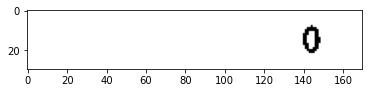

idx : 71
fn : ./Screenshots\Screenshot_2020-08-23-14-33-15.png
str : 0
Avg : 251.85
93/326


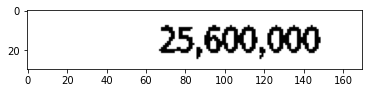

idx : 93
fn : ./Screenshots\Screenshot_2020-08-23-14-34-24.png
str : 
Avg : 229.1
109/326


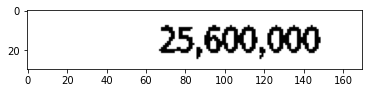

idx : 109
fn : ./Screenshots\Screenshot_2020-08-23-14-35-15.png
str : 
Avg : 229.1
145/326


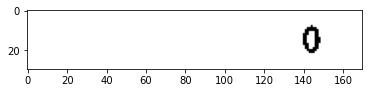

idx : 145
fn : ./Screenshots\Screenshot_2020-08-23-14-37-11.png
str : 0
Avg : 251.85
167/326


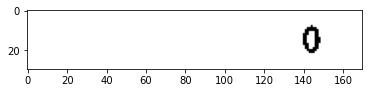

idx : 167
fn : ./Screenshots\Screenshot_2020-08-23-14-38-23.png
str : 0
Avg : 251.85
175/326


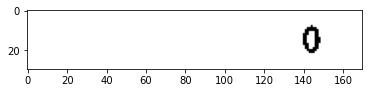

idx : 175
fn : ./Screenshots\Screenshot_2020-08-23-14-38-47.png
str : 0
Avg : 251.85
179/326


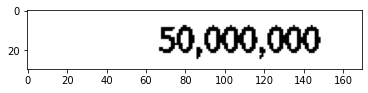

idx : 179
fn : ./Screenshots\Screenshot_2020-08-23-14-39-03.png
str : 
Avg : 228.7
221/326


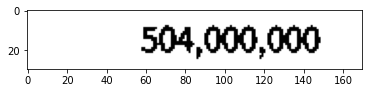

idx : 221
fn : ./Screenshots\Screenshot_2020-08-23-14-41-17.png
str : 
Avg : 225.9


In [38]:
idx_5T = [145, 163, 165, 287]
idx_assist = [71, 93, 109, 145, 167, 175, 179, 221]
for idx in idx_assist:
    print('{}/{}'.format(idx,len(profile_list)))
    fn = profile_list[idx]
    img = cv2.imread(fn,0)

    kill_4Tp = crop_dict['kill_4T']
    kill_5Tp = crop_dict['kill_5T']
    deathp = crop_dict['death']
    gatheringp = crop_dict['gathering']
    assistp = crop_dict['assist']

    img_kill4T = img[kill_4Tp[0]:kill_4Tp[1], kill_4Tp[2]:kill_4Tp[3]]
    img_kill5T = img[kill_5Tp[0]:kill_5Tp[1], kill_5Tp[2]:kill_5Tp[3]]
    img_death = img[deathp[0]:deathp[1], deathp[2]:deathp[3]]
    img_gathering = img[gatheringp[0]:gatheringp[1], gatheringp[2]:gatheringp[3]]
    img_assist = img[assistp[0]:assistp[1], assistp[2]:assistp[3]]

    inv_kill4T, str_kill4T = bin_inv(img_kill4T, thr=80, inv=False)
    inv_kill5T, str_kill5T = bin_inv(img_kill5T, thr=80, inv=False)
    inv_death, str_death = bin_inv(img_death, thr=145)
    inv_gathering, str_gathering = bin_inv(img_gathering, thr=120)
    inv_assist, str_assist = bin_inv(img_assist, thr=120)

    kill_4T, kill_5T, death = str2num(str_kill4T), str2num(str_kill5T), str2num(str_death)
    gathering, assist = str2num(str_gathering), str2num(str_assist)
    
    cond = [kill_4T, kill_5T, death, gathering, assist]
    inv_imgs =[inv_kill4T, inv_kill5T, inv_death, inv_gathering, inv_assist]
    str_imgs =[str_kill4T, str_kill5T, str_death, str_gathering, str_assist]
    
    cond_id = -1
    plt.imshow(inv_imgs[cond_id], 'gray')
    plt.show()
    print("idx : {}".format(idx))
    print("fn : {}".format(profile_list[idx]))
    print("str : {}".format(str_imgs[cond_id]))
    print("Avg : {}".format(np.mean(inv_imgs[cond_id])))
#         plt.imshow(img, 'gray')
#         plt.show()
#         plt.imshow(inv_kill4T, 'gray')
#         plt.show()
#         print(str_kill4T)
#         plt.imshow(inv_kill5T, 'gray')
#         plt.show()
#         print(str_kill5T)
#         plt.imshow(inv_death, 'gray')
#         plt.show()
#         print(str_death)
#         plt.imshow(inv_gathering, 'gray')
#         plt.show()
#         print(str_gathering)
#         plt.imshow(inv_assist, 'gray')
#         plt.show()
#         print(str_assist)

145/326


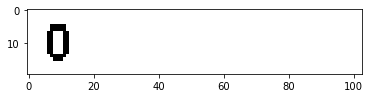

idx : 145
fn : ./Screenshots\Screenshot_2020-08-23-14-37-11.png
str : 0
Avg : 249.30582524271844
163/326


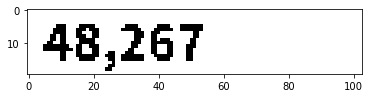

idx : 163
fn : ./Screenshots\Screenshot_2020-08-23-14-38-11.png
str : ‘48,267
Avg : 225.6626213592233
165/326


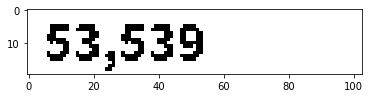

idx : 165
fn : ./Screenshots\Screenshot_2020-08-23-14-38-17.png
str : $3,539
Avg : 225.16747572815535
287/326


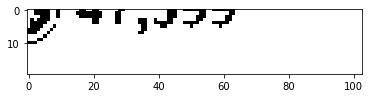

idx : 287
fn : ./Screenshots\Screenshot_2020-08-23-14-44-48.png
str : yee
Avg : 236.43203883495147


In [39]:
idx_5T = [145, 163, 165, 287]
idx_assist = [71, 93, 109, 145, 167, 175, 179, 221]
for idx in idx_5T:
    print('{}/{}'.format(idx,len(profile_list)))
    fn = profile_list[idx]
    img = cv2.imread(fn,0)

    kill_4Tp = crop_dict['kill_4T']
    kill_5Tp = crop_dict['kill_5T']
    deathp = crop_dict['death']
    gatheringp = crop_dict['gathering']
    assistp = crop_dict['assist']

    img_kill4T = img[kill_4Tp[0]:kill_4Tp[1], kill_4Tp[2]:kill_4Tp[3]]
    img_kill5T = img[kill_5Tp[0]:kill_5Tp[1], kill_5Tp[2]:kill_5Tp[3]]
    img_death = img[deathp[0]:deathp[1], deathp[2]:deathp[3]]
    img_gathering = img[gatheringp[0]:gatheringp[1], gatheringp[2]:gatheringp[3]]
    img_assist = img[assistp[0]:assistp[1], assistp[2]:assistp[3]]

    inv_kill4T, str_kill4T = bin_inv(img_kill4T, thr=80, inv=False)
    inv_kill5T, str_kill5T = bin_inv(img_kill5T, thr=80, inv=False)
    inv_death, str_death = bin_inv(img_death, thr=145)
    inv_gathering, str_gathering = bin_inv(img_gathering, thr=120)
    inv_assist, str_assist = bin_inv(img_assist, thr=120)

    kill_4T, kill_5T, death = str2num(str_kill4T), str2num(str_kill5T), str2num(str_death)
    gathering, assist = str2num(str_gathering), str2num(str_assist)
    
    cond = [kill_4T, kill_5T, death, gathering, assist]
    inv_imgs =[inv_kill4T, inv_kill5T, inv_death, inv_gathering, inv_assist]
    str_imgs =[str_kill4T, str_kill5T, str_death, str_gathering, str_assist]
    
    cond_id = 1
    plt.imshow(inv_imgs[cond_id], 'gray')
    plt.show()
    print("idx : {}".format(idx))
    print("fn : {}".format(profile_list[idx]))
    print("str : {}".format(str_imgs[cond_id]))
    print("Avg : {}".format(np.mean(inv_imgs[cond_id])))
#         plt.imshow(img, 'gray')
#         plt.show()
#         plt.imshow(inv_kill4T, 'gray')
#         plt.show()
#         print(str_kill4T)
#         plt.imshow(inv_kill5T, 'gray')
#         plt.show()
#         print(str_kill5T)
#         plt.imshow(inv_death, 'gray')
#         plt.show()
#         print(str_death)
#         plt.imshow(inv_gathering, 'gray')
#         plt.show()
#         print(str_gathering)
#         plt.imshow(inv_assist, 'gray')
#         plt.show()
#         print(str_assist)

np.mean 248 이하면 에러라고 판단하는게 좋을듯

In [ ]:
idx = 17
fn = profile_list[idx]
img = cv2.imread(fn,0)
plt.imshow(img, 'gray')
plt.show()

kill_4Tp = crop_dict['kill_4T']
kill_5Tp = crop_dict['kill_5T']
deathp = crop_dict['death']
gatheringp = crop_dict['gathering']
assistp = crop_dict['assist']

img_kill4T = img[kill_4Tp[0]:kill_4Tp[1], kill_4Tp[2]+2:kill_4Tp[3]]
img_kill5T = img[kill_5Tp[0]:kill_5Tp[1], kill_5Tp[2]:kill_5Tp[3]]
img_death = img[deathp[0]:deathp[1], deathp[2]:deathp[3]]
img_gathering = img[gatheringp[0]:gatheringp[1], gatheringp[2]:gatheringp[3]]
img_assist = img[assistp[0]:assistp[1], assistp[2]:assistp[3]]

inv_kill4T, str_kill4T = bin_inv(img_kill4T, thr=80, inv=False)
inv_kill5T, str_kill5T = bin_inv(img_kill5T, thr=80, inv=False)
inv_death, str_death = bin_inv(img_death, thr=120)
inv_gathering, str_gathering = bin_inv(img_gathering, thr=120)
inv_assist, str_assist = bin_inv(img_assist, thr=120)

plt.imshow(inv_kill4T, 'gray')
plt.show()
print(str_kill4T)
plt.imshow(inv_kill5T, 'gray')
plt.show()
print(str_kill5T)
plt.imshow(inv_death, 'gray')
plt.show()
print(str_death)
plt.imshow(inv_gathering, 'gray')
plt.show()
print(str_gathering)
plt.imshow(inv_assist, 'gray')
plt.show()
print(str_assist)

In [ ]:
print(chr(8227))

In [ ]:
print(ord('‘'))

In [ ]:
a = '‘406,107'
a

In [ ]:
plt.imshow(inv_gathering, 'gray')
plt.show()
print(str_gathering)

In [ ]:
str_gathering.replace('.','').replace(',','').replace(' ','')

In [ ]:
str2num(str_gathering)

In [ ]:
str_kill5T

In [ ]:
inv_kill5T, str_kill5T = bin_inv(img_kill5T, thr=140, inv=False)
plt.imshow(inv_kill5T, 'gray')
plt.show()
print(str_kill5T)

In [ ]:
inv_death, str_death = bin_inv(img_death, thr=156)
plt.imshow(inv_death, 'gray')
plt.show()
print(str_death)

In [ ]:
def bin_inv2(img, thr=140, show=False, inv=True):
    ret,thresh2 = cv2.threshold(img,thr,255,cv2.THRESH_BINARY_INV)
    if not inv:
        ret,thresh2 = cv2.threshold(img,thr,255,cv2.THRESH_BINARY)
    config = '-c tessedit_char_whitelist=0123456789'
    ocr_result = pytesseract.image_to_string(thresh2, config=config)
    if show:
        plt.imshow(thresh2, 'gray')
        plt.show()
        print(ocr_result)
    return thresh2, ocr_result

In [ ]:
inv_gathering, str_gathering = bin_inv(img_gathering, thr=120)
plt.imshow(inv_gathering, 'gray')
plt.show()
print(str_gathering)

In [ ]:
inv_gathering, str_gathering = bin_inv2(img_gathering, thr=160)
plt.imshow(inv_gathering, 'gray')
plt.show()
print(str_gathering)

In [ ]:
inv_death, str_death = bin_inv(img_death, thr=140)
plt.imshow(inv_death, 'gray')
plt.show()
print(str_death)

In [ ]:
inv_death, str_death = bin_inv2(img_death, thr=140)
plt.imshow(inv_death, 'gray')
plt.show()
print(str_death)